<a href="https://colab.research.google.com/github/nkorzounUD/DSPS_NKorzoun/blob/main/HW10/ffnn_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Must change runtime to GPU!!!!!

### Do this by...
Runtime -> Change runtime type -> GPU

### Must do this before doing anything or else you will have to rerun everything.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

from keras import optimizers

import pylab as pl
import numpy as np
import matplotlib.pyplot as plt



In [2]:
mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
len(mnist.load_data())

2

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

In [5]:
# First value is how many training images we have
x_train.shape

(60000, 28, 28)

In [6]:
# First value is how many testing images we have
x_test.shape

(10000, 28, 28)

In [7]:
nimg, img_row, img_col = x_train.shape

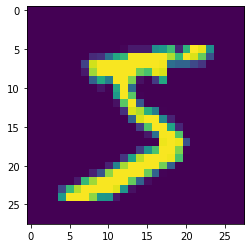

In [8]:
pl.imshow(x_train[0]);

This is the first of 60000 training images which we will use in our model to predict a digit.

In [9]:
x_train.max()

255

In [10]:
x_train.dtype

dtype('uint8')

In [11]:
# Normalize so that image values are now from 0 to 1 instead of 0 to 255

# Same normalization for the training and test set
x_train = (x_train.astype(float) / 255)

# Normalize and reshape x_test also
x_test = (x_test.astype(float) / 255)

In [12]:
# Make sure normalization worked for training set
x_train.min(), x_train.max()

(0.0, 1.0)

In [13]:
# Make sure normalization is the same for the testing set
x_test.min(), x_test.max()

(0.0, 1.0)

In [14]:
x_train.reshape(nimg, img_row*img_col).shape

(60000, 784)

In [15]:
# Reshape training set so that it is one-dimensional for a single image
# (can now be input into our model)

x_train = x_train.reshape(nimg, img_row*img_col)
x_train.shape

(60000, 784)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
# Also reshape testing set so it is one-dimensional for a single image
x_test = x_test.reshape(x_test.shape[0], img_row*img_col)

In [18]:
# The y_train data must be a copy of our x_train data
# This is because our model is an encoder
# (encoder = transform data to a lower dimensional representation)
y_train = x_train.copy()

In [19]:
# Creates model
model_digits = Sequential()

In [20]:
# Add model layers
# Here we encode 28^2 = 784 dimensions down to 64 dimensions then de-encode

# Encoding...
#model_digits.add(Dense(256, activation="relu", input_dim=img_row*img_col))
model_digits.add(Dense(128, activation="relu", input_dim=img_row*img_col))
model_digits.add(Dense(64, activation="relu"))

# De-encoding... (last activation must be linear)
model_digits.add(Dense(128, activation="relu"))
#model_digits.add(Dense(img_row*img_col, activation="linear"))
# Do activation="sigmoid" for better results
model_digits.add(Dense(img_row*img_col, activation="sigmoid"))

In [21]:
# Choose optimizer and loss function
# Can change these to try getting better results for our FFNN
# From slides, best combo looks like opt=adadelta and loss=binary_crossentropy
# where activation function must be "sigmoid" instead of "relu"

model_digits.compile(optimizer="adadelta", loss="mean_squared_error")

In [22]:
model_digits.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Architecture is x_train x_train instead of x_train y_train bc it's an encoder
ffnn_digit=model_digits.fit(x_train, x_train, validation_data=(x_test, x_test),
                            epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 4s 4ms/step - loss: 0.2321 - val_loss: 0.2321
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2320 - val_loss: 0.2320
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2318 - val_loss: 0.2319
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2317 - val_loss: 0.2317
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2316 - val_loss: 0.2316
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2314 - val_loss: 0.2315
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2313 - val_loss: 0.2314
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2312 - val_loss: 0.2312
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2311 - val_loss: 0.2311
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2310 - val_loss: 0.2310

In [24]:
ffnn_digit.history

{'loss': [0.23208752274513245,
  0.23195576667785645,
  0.23182646930217743,
  0.2316989004611969,
  0.23157314956188202,
  0.23144878447055817,
  0.23132574558258057,
  0.23120370507240295,
  0.23108215630054474,
  0.23096151649951935,
  0.23084114491939545,
  0.2307208925485611,
  0.2306002378463745,
  0.23047955334186554,
  0.23035839200019836,
  0.23023638129234314,
  0.23011358082294464,
  0.229989692568779,
  0.2298644632101059,
  0.22973772883415222],
 'val_loss': [0.23211349546909332,
  0.23198242485523224,
  0.23185355961322784,
  0.23172666132450104,
  0.23160137236118317,
  0.23147743940353394,
  0.23135463893413544,
  0.2312326729297638,
  0.23111122846603394,
  0.23099033534526825,
  0.23086969554424286,
  0.23074902594089508,
  0.230628103017807,
  0.2305067628622055,
  0.23038484156131744,
  0.23026211559772491,
  0.23013842105865479,
  0.2300136536359787,
  0.22988726198673248,
  0.2297593206167221]}

In [25]:
out_loss = ffnn_digit.history['loss']
out_val_loss = ffnn_digit.history['val_loss']

In [26]:
len(out_loss), len(out_val_loss)

(20, 20)

In [27]:
epoch_num = np.linspace(1, len(out_loss), len(out_loss), endpoint=True)

In [28]:
# Make sure epoch number is defined correctly
epoch_num

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [29]:
out_loss = np.array(out_loss)
out_val_loss = np.array(out_val_loss)

In [30]:
out_loss, out_val_loss

(array([0.23208752, 0.23195577, 0.23182647, 0.2316989 , 0.23157315,
        0.23144878, 0.23132575, 0.23120371, 0.23108216, 0.23096152,
        0.23084114, 0.23072089, 0.23060024, 0.23047955, 0.23035839,
        0.23023638, 0.23011358, 0.22998969, 0.22986446, 0.22973773]),
 array([0.2321135 , 0.23198242, 0.23185356, 0.23172666, 0.23160137,
        0.23147744, 0.23135464, 0.23123267, 0.23111123, 0.23099034,
        0.2308697 , 0.23074903, 0.2306281 , 0.23050676, 0.23038484,
        0.23026212, 0.23013842, 0.23001365, 0.22988726, 0.22975932]))

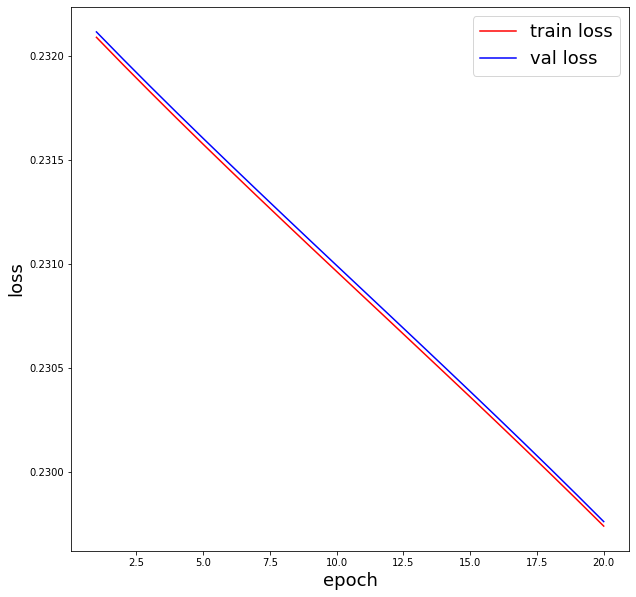

In [31]:
plt.figure(figsize=(10, 10))

plt.plot(epoch_num, out_loss, color='red', linestyle='solid',
         label='train loss')
plt.plot(epoch_num, out_val_loss, color='blue', linestyle='solid',
         label='val loss')

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()

# Need to train a lot more, try epoch=100

In [32]:
# Architecture is x_train x_train instead of x_train y_train bc it's an encoder
ffnn_digit100=model_digits.fit(x_train, x_train, validation_data=(x_test, x_test),
                            epochs=100, batch_size=100, verbose=1)

Epoch 1/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2296 - val_loss: 0.2296
Epoch 2/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2295 - val_loss: 0.2295
Epoch 3/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2293 - val_loss: 0.2294
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2292 - val_loss: 0.2292
Epoch 5/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2291 - val_loss: 0.2291
Epoch 6/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2289 - val_loss: 0.2289
Epoch 7/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2288 - val_loss: 0.2288
Epoch 8/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2286 - val_loss: 0.2287
Epoch 9/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2285 - val_loss: 0.2285
Epoch 10/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2283 - val_lo

In [33]:
out_loss = ffnn_digit100.history['loss']
out_val_loss = ffnn_digit100.history['val_loss']

In [34]:
len(out_loss), len(out_val_loss)

(100, 100)

In [35]:
epoch_num = np.linspace(1, len(out_loss), len(out_loss), endpoint=True)

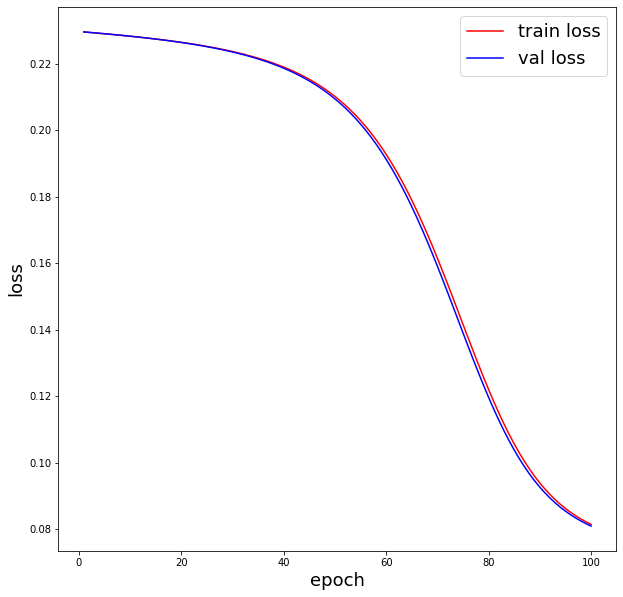

In [36]:
plt.figure(figsize=(10, 10))

plt.plot(epoch_num, out_loss, color='red', linestyle='solid',
         label='train loss')
plt.plot(epoch_num, out_val_loss, color='blue', linestyle='solid',
         label='val loss')

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()

# Still need more training! (b/c algorithm is still learning), try epoch=200. Also try making learning rate more precise.

In [47]:
opt = keras.optimizers.adam_v2.Adam(learning_rate=0.01)

In [48]:
model_digits.compile(optimizer=opt, loss="mean_squared_error")

In [49]:
# Architecture is x_train x_train instead of x_train y_train bc it's an encoder
ffnn_digit200=model_digits.fit(x_train, x_train, validation_data=(x_test, x_test),
                            epochs=200, batch_size=100, verbose=1)

Epoch 1/200
600/600 [==============================] - 3s 4ms/step - loss: 0.0203 - val_loss: 0.0119
Epoch 2/200
600/600 [==============================] - 2s 4ms/step - loss: 0.0106 - val_loss: 0.0094
Epoch 3/200
600/600 [==============================] - 2s 3ms/step - loss: 0.0089 - val_loss: 0.0081
Epoch 4/200
600/600 [==============================] - 2s 4ms/step - loss: 0.0081 - val_loss: 0.0074
Epoch 5/200
600/600 [==============================] - 2s 3ms/step - loss: 0.0076 - val_loss: 0.0072
Epoch 6/200
600/600 [==============================] - 2s 4ms/step - loss: 0.0073 - val_loss: 0.0068
Epoch 7/200
600/600 [==============================] - 2s 4ms/step - loss: 0.0070 - val_loss: 0.0073
Epoch 8/200
600/600 [==============================] - 2s 4ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 9/200
600/600 [==============================] - 2s 3ms/step - loss: 0.0068 - val_loss: 0.0070
Epoch 10/200
600/600 [==============================] - 2s 4ms/step - loss: 0.0067 - val_lo

In [50]:
out_loss = ffnn_digit200.history['loss']
out_val_loss = ffnn_digit200.history['val_loss']

In [51]:
epoch_num = np.linspace(1, len(out_loss), len(out_loss), endpoint=True)

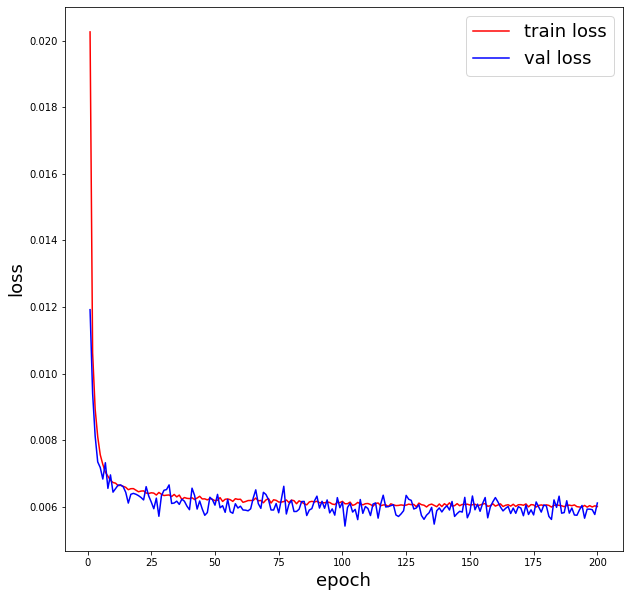

In [52]:
plt.figure(figsize=(10, 10))

plt.plot(epoch_num, out_loss, color='red', linestyle='solid',
         label='train loss')
plt.plot(epoch_num, out_val_loss, color='blue', linestyle='solid',
         label='val loss')

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()

# Zoom in to ensure overtraining is not happening and that the algorithm isn't learning anymore (although it doesn't look like it).

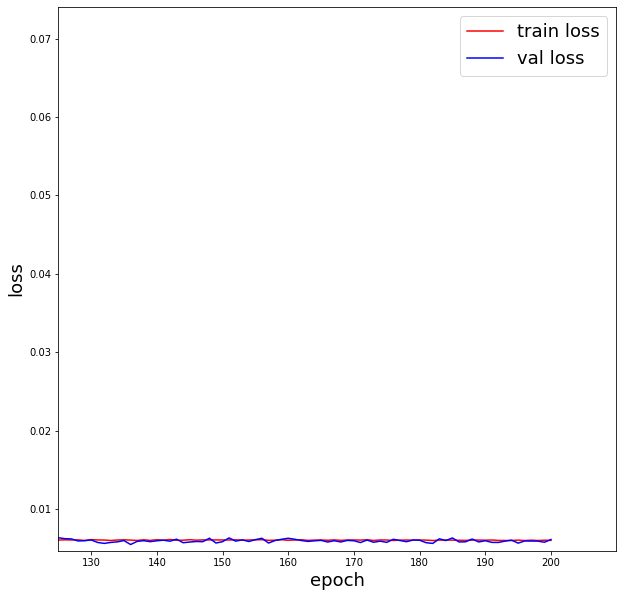

In [53]:
plt.figure(figsize=(10, 10))

plt.plot(epoch_num, out_loss, color='red', linestyle='solid',
         label='train loss')
plt.plot(epoch_num, out_val_loss, color='blue', linestyle='solid',
         label='val loss')

plt.xlim(left=125)
plt.ylim(top=0.074)

plt.xlabel('epoch', fontsize=18)
plt.ylabel('loss', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()

# Looks good. Still might be learning although it is not worth it to run for more epochs (not learning at a fast enough rate).

# Now predict what we would get from our FFNN

In [54]:
output_image64 = model_digits.predict(x_test)

In [55]:
def compareinout(i, outim, testimg, initialshape=(28,28)):
  '''
  Function to plot the input and the target.
  Plots the ith training data point.

  Parameters:
  i -> Index of training data to plot
  outim -> Name of the predicted (target) image
  testing -> Name of the testing data set to predict
  initialshape -> Shape of the output image
  '''
  fig = plt.figure(figsize=(10,5))
  ax = fig.add_subplot(121) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(122) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


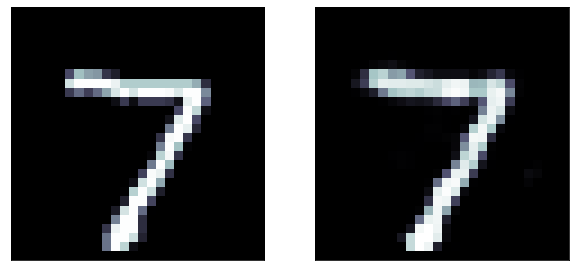

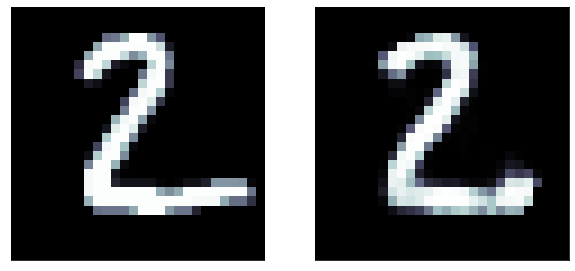

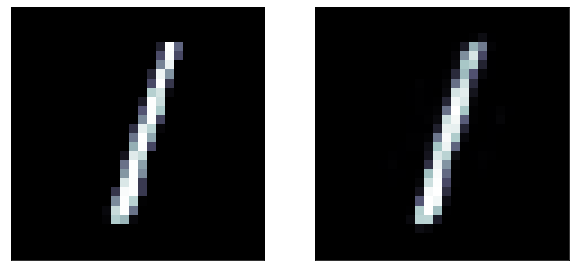

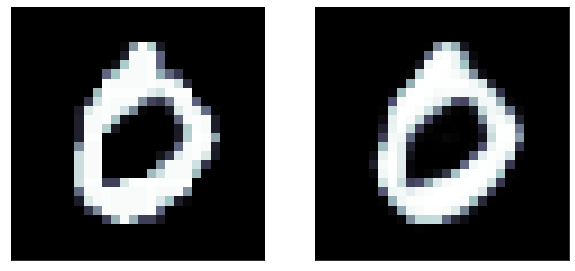

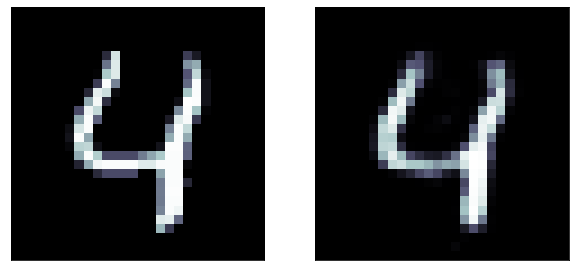

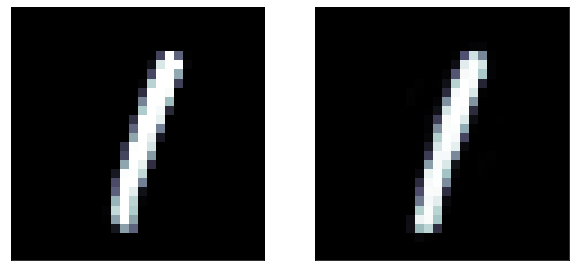

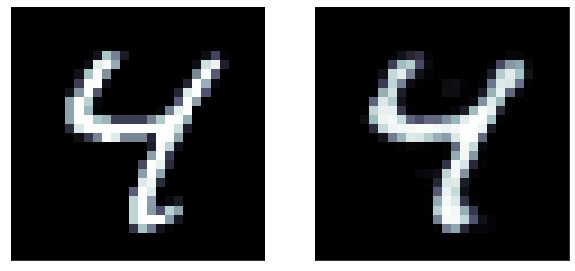

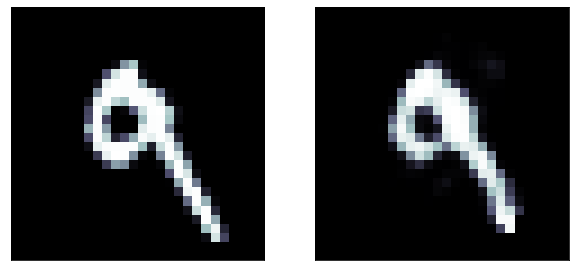

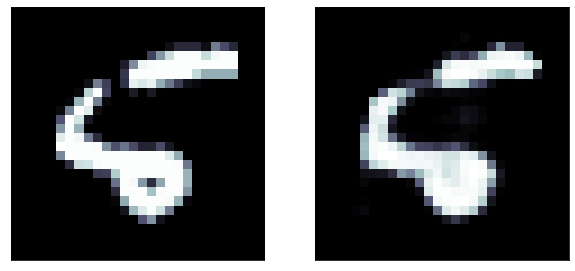

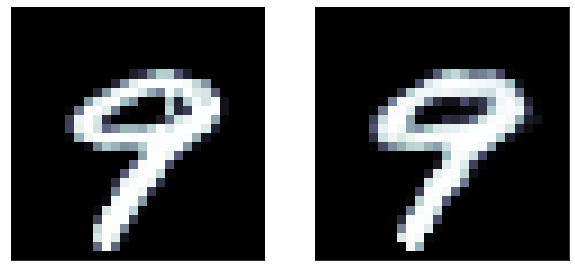

In [56]:
for i in range(10):
  compareinout(i, output_image64, x_test)
